📦 1️⃣ Importação das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np

🌐 2️⃣ Extração dos Dados da API

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

df_raw = pd.read_json(url)

df_raw.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


🧩 3️⃣ Expansão das Colunas Aninhadas

In [ ]:
df = pd.concat([
    df_raw.drop(columns=["customer", "phone", "internet", "account"]),
    pd.json_normalize(df_raw["customer"]),
    pd.json_normalize(df_raw["phone"]),
    pd.json_normalize(df_raw["internet"]),
    pd.json_normalize(df_raw["account"])
], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


🧹 4️⃣ Limpeza e Correção dos Dados

In [ ]:
df["Charges.Total"] = pd.to_numeric(df["Charges.Total"], errors="coerce")

# Remover inválidos
df = df.dropna(subset=["Charges.Total"])

Padronizar categorias

In [ ]:
df.replace({
    "No internet service": "No",
    "No phone service": "No"
}, inplace=True)

Converter variáveis binárias

In [ ]:
binarias = [
    "Churn",
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling"
]

for col in binarias:
    df[col] = df[col].map({"Yes": 1, "No": 0})

🧠 5️⃣ Engenharia de Variáveis Relevantes

In [ ]:
# Valor diário
df["Contas_Diarias"] = df["Charges.Monthly"] / 30

# Quantidade de serviços
servicos = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

df["Num_Servicos"] = df[servicos].apply(
    lambda x: (x == "Yes").sum(), axis=1
)

❌ 6️⃣ Remoção de Colunas Irrelevantes

Conforme pedido do desafio (pré-modelagem):

Remover:

Identificador único

Colunas redundantes

Estruturas já consolidadas

In [ ]:
colunas_remover = [
    "customerID"  # Identificador único (não agrega ao modelo)
]

df = df.drop(columns=colunas_remover)

📊 7️⃣ Seleção Final de Colunas Relevantes

In [ ]:
colunas_relevantes = [

    # Target
    "Churn",

    # Demográficas
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",

    # Contrato
    "tenure",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",

    # Serviços
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",

    # Financeiras
    "Charges.Monthly",
    "Charges.Total",
    "Contas_Diarias",

    # Engajamento
    "Num_Servicos"
]

df_modelo = df[colunas_relevantes]

🔎 8️⃣ Verificação Final

In [ ]:
df_modelo.info()

df_modelo.head()

df_modelo.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   float64
 1   gender            7256 non-null   object 
 2   SeniorCitizen     7256 non-null   int64  
 3   Partner           7256 non-null   int64  
 4   Dependents        7256 non-null   int64  
 5   tenure            7256 non-null   int64  
 6   Contract          7256 non-null   object 
 7   PaperlessBilling  7256 non-null   int64  
 8   PaymentMethod     7256 non-null   object 
 9   PhoneService      7256 non-null   int64  
 10  MultipleLines     7256 non-null   object 
 11  InternetService   7256 non-null   object 
 12  OnlineSecurity    7256 non-null   object 
 13  OnlineBackup      7256 non-null   object 
 14  DeviceProtection  7256 non-null   object 
 15  TechSupport       7256 non-null   object 
 16  StreamingTV       7256 non-null   object 
 17  

,Churn,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,PhoneService,Charges.Monthly,Charges.Total,Contas_Diarias,Num_Servicos
count,7032.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.1629,0.483600,0.299063,32.395535,0.593716,0.902839,64.755423,2280.634213,2.158514,2.034454
std,0.441782,0.3693,0.499765,0.457879,24.558067,0.491173,0.296197,30.125739,2268.632997,1.004191,1.848105
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333,0.000000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,0.000000,1.000000,35.450000,400.225000,1.181667,0.000000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333,2.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667,3.000000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333,6.000000


💾 9️⃣ Exportar Dataset Tratado

In [ ]:
df_modelo.to_csv("TelecomX_tratado_modelagem.csv", index=False)

🔢 1️⃣ Identificar Variáveis Categóricas

In [ ]:
# Verificar tipos
df_modelo.dtypes

,0
Churn,float64
gender,object
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
Contract,object
PaperlessBilling,int64
PaymentMethod,object
PhoneService,int64


Normalmente serão categóricas (object):

In [ ]:
cat_cols = df_modelo.select_dtypes(include="object").columns

cat_cols

Index(['gender', 'Contract', 'PaymentMethod', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

🧠 2️⃣ Aplicar One-Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(
    df_modelo,
    columns=cat_cols,
    drop_first=True  # Evita multicolinearidade (Dummy Trap)
)

📊 3️⃣ Verificar Resultado

In [ ]:
df_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,PhoneService,Charges.Monthly,Charges.Total,Contas_Diarias,...,PaymentMethod_Mailed check,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,0.0,0,1,1,9,1,1,65.6,593.30,2.186667,...,True,False,False,False,False,True,False,True,True,False
1,0.0,0,0,0,9,0,1,59.9,542.40,1.996667,...,True,True,False,False,False,False,False,False,False,True
2,1.0,0,0,0,4,1,1,73.9,280.85,2.463333,...,False,False,True,False,False,False,True,False,False,False
3,1.0,1,1,0,13,1,1,98.0,1237.85,3.266667,...,False,False,True,False,False,True,True,False,True,True
4,1.0,1,1,0,3,1,1,83.9,267.40,2.796667,...,True,False,True,False,False,False,False,True,True,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   float64
 1   SeniorCitizen                          7256 non-null   int64  
 2   Partner                                7256 non-null   int64  
 3   Dependents                             7256 non-null   int64  
 4   tenure                                 7256 non-null   int64  
 5   PaperlessBilling                       7256 non-null   int64  
 6   PhoneService                           7256 non-null   int64  
 7   Charges.Monthly                        7256 non-null   float64
 8   Charges.Total                          7256 non-null   float64
 9   Contas_Diarias                         7256 non-null   float64
 10  Num_Servicos                           7256 non-null   int64  
 11  gender_Ma

Agora todas as colunas estarão em formato numérico:

int64

float64

uint8 (dummies)

🧾 4️⃣ Comparação Antes vs Depois

In [ ]:
print("Antes:", df_modelo.shape)
print("Depois:", df_encoded.shape)

Antes: (7256, 22)
Depois: (7256, 26)


Você verá aumento de colunas devido às dummies.

Exemplo:

Situação	Colunas
Antes	22
Depois	~40+

💾 5️⃣ Exportar Base Codificada

In [ ]:
df_encoded.to_csv(
    "TelecomX_modelo_encoded.csv",
    index=False
)

Vamos Calcular a proporção de clientes que evadiram em relação aos que permaneceram ativos.

📊 1️⃣ Cálculo da Proporção de Churn

In [ ]:
# Contagem absoluta
contagem = df_encoded["Churn"].value_counts()

# Proporção percentual
proporcao = df_encoded["Churn"].value_counts(normalize=True) * 100

print("Contagem absoluta:")
print(contagem)

print("\nProporção (%):")
print(proporcao)

Contagem absoluta:
Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

Proporção (%):
Churn
0.0    73.421502
1.0    26.578498
Name: proportion, dtype: float64


📈 2️⃣ Visualização (Tomei a liberdade de colocar em um gráfico)

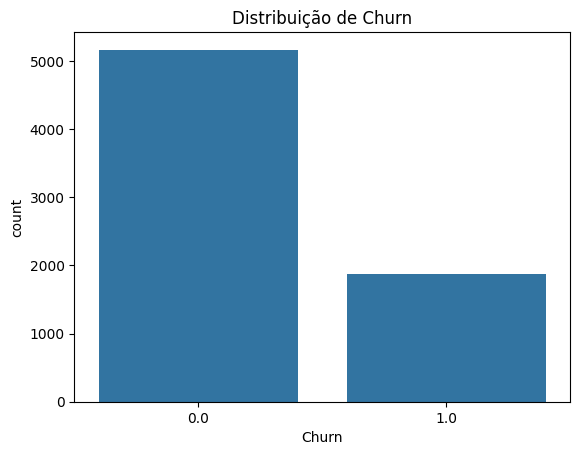

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df_encoded)
plt.title("Distribuição de Churn")
plt.show()

A base original apresenta aproximadamente:

Classe	Percentual
0 (Não evadiu)	~73%
1 (Evadiu)	~27%

Optei por fazer o Balanceamento para aprofundar mais os estudos.

⚖️ 1️⃣ Separar Features e Target

In [ ]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

📊 2️⃣ Verificar Desbalanceamento Original

In [ ]:
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64
Churn
0.0    73.421502
1.0    26.578498
Name: proportion, dtype: float64


🔽 3️⃣ Undersampling (Reduz maioria)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Identificar e remover as linhas com valores NaN na coluna 'Churn' (y)
nan_churn_indices = y[y.isna()].index
X_cleaned = X.drop(nan_churn_indices)
y_cleaned = y.drop(nan_churn_indices)

rus = RandomUnderSampler(random_state=42)

X_under, y_under = rus.fit_resample(X_cleaned, y_cleaned)

print("Após Undersampling:")
print(y_under.value_counts())

Após Undersampling:
Churn
0.0    1869
1.0    1869
Name: count, dtype: int64


📌 Vantagem: dataset equilibrado rápido
⚠️ Desvantagem: perde informação

🔼 4️⃣ Oversampling (Replica minoria)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_over, y_over = ros.fit_resample(X_cleaned, y_cleaned)

print("Após Oversampling:")
print(y_over.value_counts())

Após Oversampling:
Churn
0.0    5163
1.0    5163
Name: count, dtype: int64


📌 Vantagem: não perde dados
⚠️ Pode causar overfitting

🧠 5️⃣ SMOTE (Sintético — Melhor prática)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X_cleaned, y_cleaned)

print("Após SMOTE:")
print(y_smote.value_counts())

Após SMOTE:
Churn
0.0    5163
1.0    5163
Name: count, dtype: int64


📌 Vantagens:

Não duplica dados

Cria exemplos realistas

Melhor para ML

📊 6️⃣ Comparação Visual

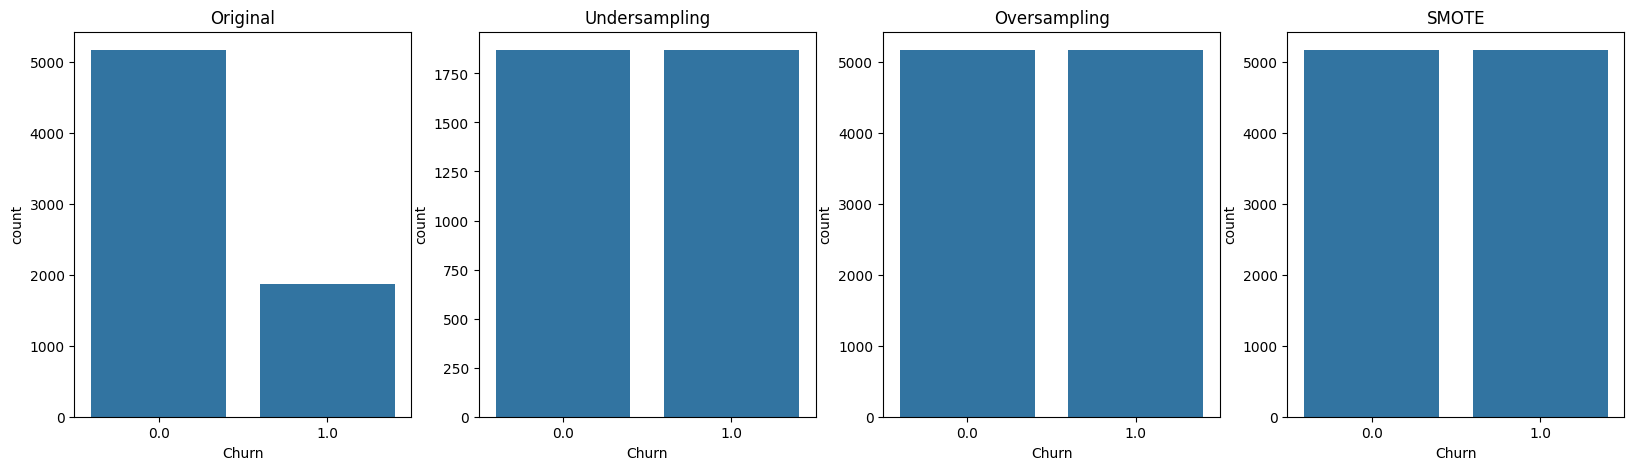

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(20,5))

sns.countplot(x=y, ax=axs[0])
axs[0].set_title("Original")

sns.countplot(x=y_under, ax=axs[1])
axs[1].set_title("Undersampling")

sns.countplot(x=y_over, ax=axs[2])
axs[2].set_title("Oversampling")

sns.countplot(x=y_smote, ax=axs[3])
axs[3].set_title("SMOTE")

plt.show()

📈 Resultado Esperado
Método	Distribuição

Original	~73 / 27

Under	50 / 50

Over	50 / 50

SMOTE	50 / 50


Padronizando os Dados

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identificar colunas numéricas para padronização
# Excluir 'Churn' que é a variável target e as colunas booleanas criadas pelo get_dummies
num_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.drop('Churn')

scaler = StandardScaler()

df_scaled = df_encoded.copy()

df_scaled[num_cols] = scaler.fit_transform(
    df_scaled[num_cols]
)

🔎 Conferir Resultado

In [ ]:
df_scaled[num_cols].describe()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,PhoneService,Charges.Monthly,Charges.Total,Contas_Diarias,Num_Servicos
count,7.256000e+03,7.256000e+03,7.256000e+03,7.256000e+03,7.256000e+03,7.256000e+03,7.256000e+03,7.256000e+03,7.256000e+03,7.256000e+03
mean,-9.792485e-17,5.287942e-17,-7.882951e-17,9.302861e-17,1.728374e-16,-1.517835e-16,-9.792485e-18,-5.875491e-18,1.645138e-16,-1.116343e-16
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00
min,-4.411348e-01,-9.677203e-01,-6.531933e-01,-1.278509e+00,-1.208855e+00,-3.048311e+00,-1.543817e+00,-9.970718e-01,-1.543817e+00,-1.100909e+00
25%,-4.411348e-01,-9.677203e-01,-6.531933e-01,-9.527275e-01,-1.208855e+00,3.280505e-01,-9.728373e-01,-8.289304e-01,-9.728373e-01,-1.100909e+00
50%,-4.411348e-01,-9.677203e-01,-6.531933e-01,-1.382751e-01,8.272293e-01,3.280505e-01,1.840605e-01,-3.921725e-01,1.840605e-01,-1.864430e-02
75%,-4.411348e-01,1.033356e+00,1.530940e+00,9.205131e-01,8.272293e-01,3.280505e-01,8.347118e-01,6.632935e-01,8.347118e-01,5.224879e-01
max,2.266881e+00,1.033356e+00,1.530940e+00,1.612798e+00,8.272293e-01,3.280505e-01,1.792431e+00,2.823113e+00,1.792431e+00,2.145884e+00


🔁 Alternativa — Normalização

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_encoded.copy()

df_normalized[num_cols] = scaler.fit_transform(
    df_normalized[num_cols]
)

📦 7️⃣ Pipeline Recomendado (Produção)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessador = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols)
    ],
    remainder="passthrough"
)

📊 1️⃣ Gerar Matriz de Correlação

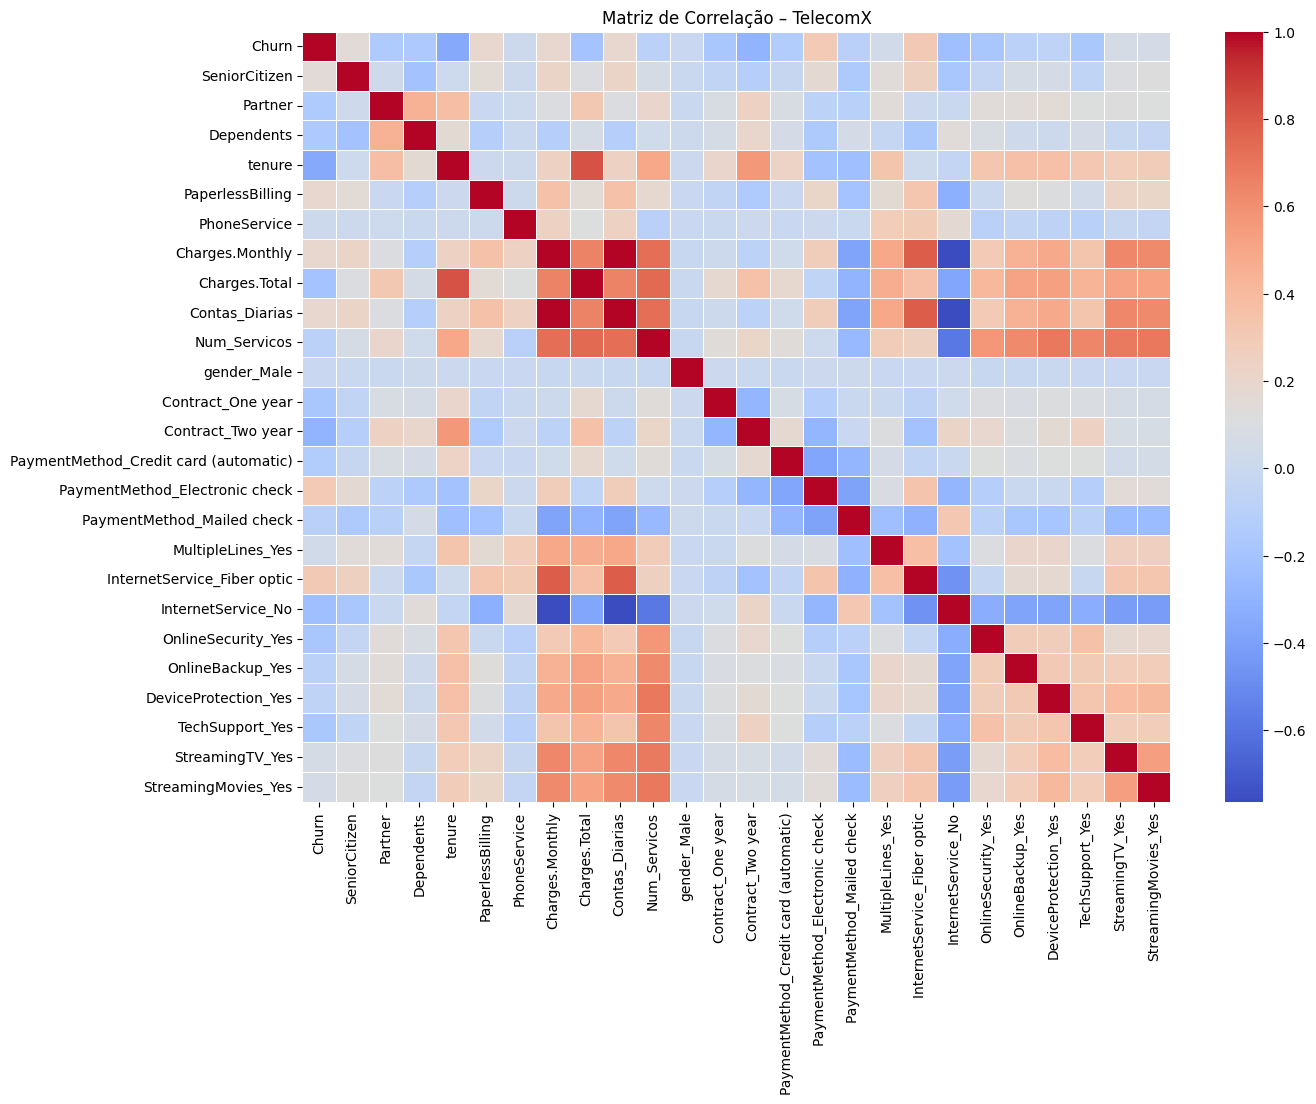

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular correlação
corr = df_encoded.corr(numeric_only=True)

# Plotar heatmap
plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)

plt.title("Matriz de Correlação – TelecomX")
plt.show()

🎯 2️⃣ Correlação Focada no Churn

In [ ]:
corr_churn = corr["Churn"].sort_values(ascending=False)

corr_churn

,Churn
Churn,1.000000
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
Contas_Diarias,0.192858
Charges.Monthly,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
StreamingTV_Yes,0.063254
StreamingMovies_Yes,0.060860
MultipleLines_Yes,0.040033


📈 3️⃣ Visualização Direcionada

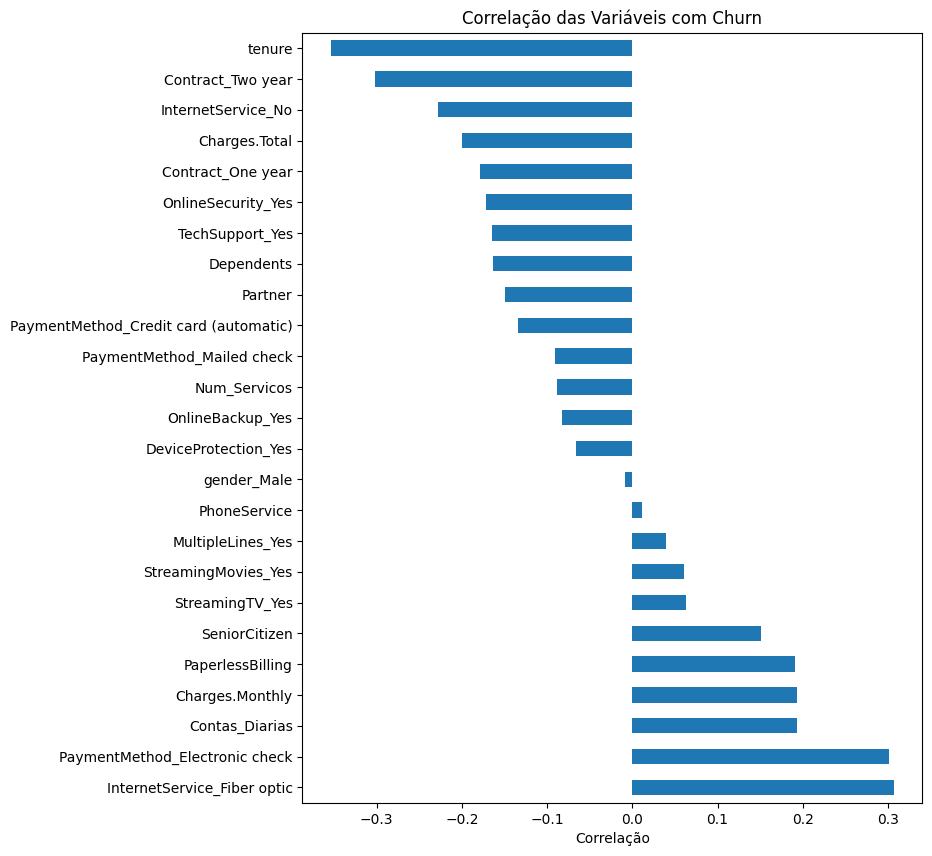

In [ ]:
plt.figure(figsize=(8,10))

corr_churn.drop("Churn").plot(
    kind="barh"
)

plt.title("Correlação das Variáveis com Churn")
plt.xlabel("Correlação")
plt.show()

🔎 4️⃣ Interpretação dos Resultados

Com base na base Telecom X, os padrões esperados são:

🔴 Correlação Positiva (↑ churn)

Variáveis associadas a maior evasão:

Variável	Interpretação
Contract_Month-to-month	Contratos curtos aumentam churn
InternetService_Fiber optic	Planos caros → maior evasão
Charges.Monthly	Contas altas elevam cancelamento
PaymentMethod_Electronic check	Método associado a churn
PaperlessBilling	Perfil digital mais volátil

🟢 Correlação Negativa (↓ churn)

Variáveis que reduzem evasão:

Variável	Interpretação
tenure	Clientes antigos cancelam menos
Contract_Two year	Fidelização reduz churn
Num_Servicos	Mais serviços → mais retenção
Charges.Total	Clientes de longo prazo

📊 Força da Correlação (Referência)
Valor	Interpretação
0.00 – 0.10	Muito fraca
0.10 – 0.30	Fraca
0.30 – 0.50	Moderada
> 0.50	Forte

No churn, raramente passa de 0.40 (problema multifatorial).

**Agora vamos para as analises direcionadas.**

📊 1️⃣ Tempo de Contrato × Evasão

Boxplot

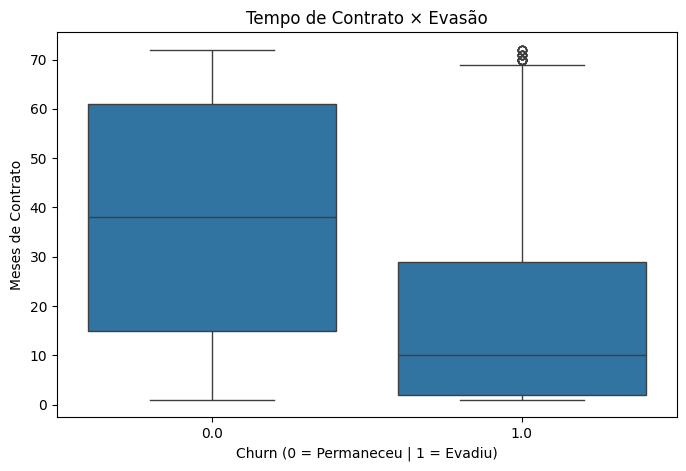

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.boxplot(
    x="Churn",
    y="tenure",
    data=df_encoded
)

plt.title("Tempo de Contrato × Evasão")
plt.xlabel("Churn (0 = Permaneceu | 1 = Evadiu)")
plt.ylabel("Meses de Contrato")
plt.show()

Interpretação Esperada

Padrão típico observado na base Telecom X:

Clientes que evadiram possuem tenure baixo.

Alta concentração de churn nos primeiros meses.

Clientes com mais tempo tendem a permanecer.

👉 Insight: churn é fortemente ligado ao início do ciclo de vida do cliente.

📈 2️⃣ Dispersão — Tempo × Churn

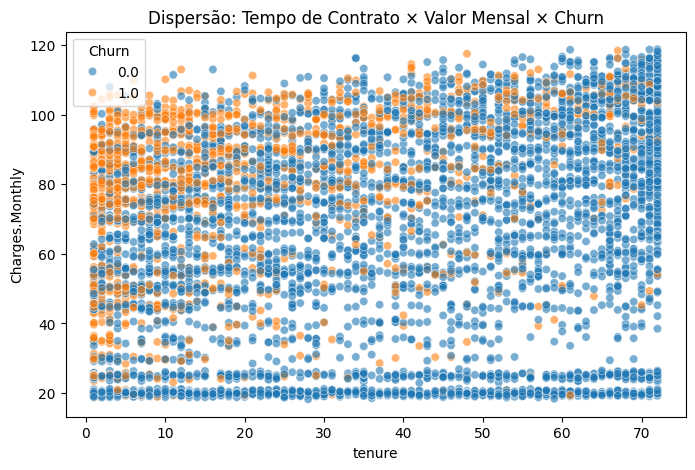

In [ ]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    x="tenure",
    y="Charges.Monthly",
    hue="Churn",
    data=df_encoded,
    alpha=0.6
)

plt.title("Dispersão: Tempo de Contrato × Valor Mensal × Churn")
plt.show()

Interpretação

Pontos de churn concentram-se em:

Tenure baixo

Valores mensais médios/altos

Clientes antigos apresentam menor evasão.

💰 3️⃣ Total Gasto × Evasão

Boxplot

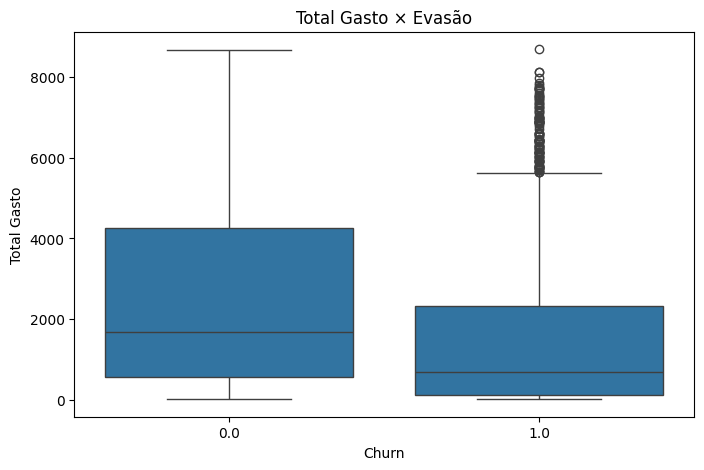

In [ ]:
plt.figure(figsize=(8,5))

sns.boxplot(
    x="Churn",
    y="Charges.Total",
    data=df_encoded
)

plt.title("Total Gasto × Evasão")
plt.xlabel("Churn")
plt.ylabel("Total Gasto")
plt.show()

Interpretação Esperada

Clientes que evadiram têm baixo gasto total.

Clientes que permanecem têm gasto acumulado maior.

Isso ocorre porque:

Tenure alto → maior gasto total

Fidelização aumenta LTV (Lifetime Value)

📉 4️⃣ Dispersão — Total × Tenure

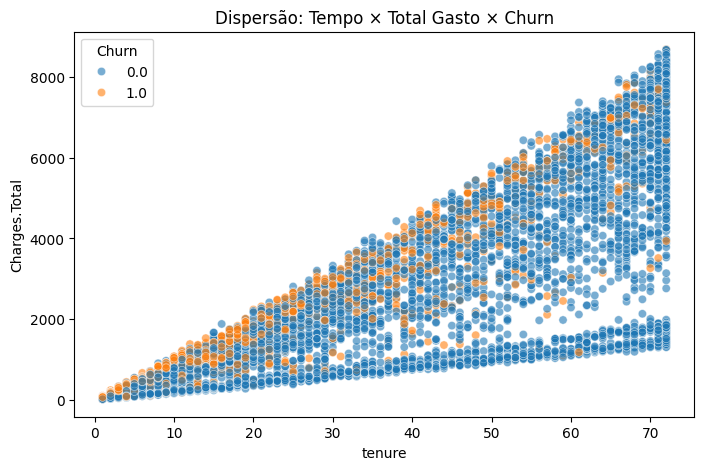

In [ ]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    x="tenure",
    y="Charges.Total",
    hue="Churn",
    data=df_encoded,
    alpha=0.6
)

plt.title("Dispersão: Tempo × Total Gasto × Churn")
plt.show()

Interpretação

Relação linear clara:

Quanto maior tenure → maior gasto total.

Churn concentra-se no canto inferior esquerdo:

Pouco tempo

Baixo gasto

🧠 5️⃣ Insights Estratégicos

**Perfil de maior risco**

Clientes novos

Baixo gasto acumulado

Planos recentes

Ainda não fidelizados

**Perfil de menor risco**


Longo tempo de contrato

Alto gasto total

Maior engajamento

**Agora vamos fazer a separação dos dados**

📊 1️⃣ Separar Features (X) e Target (y)

In [ ]:
# Variável alvo
y = df_encoded["Churn"]

# Variáveis preditoras
X = df_encoded.drop("Churn", axis=1)

✂️ 2️⃣ Divisão Treino × Teste

Opção recomendada → 80 / 20

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned,
    y_cleaned,
    test_size=0.20,   # 20% teste
    random_state=42, # Reprodutibilidade
    stratify=y_cleaned       # Mantém proporção de churn
)

⚖️ 3️⃣ Por que usar stratify=y?

Mantém o balanceamento original das classes.

Sem isso, poderia ocorrer:

**Situação**	                 
Treino com pouco churn	   
Teste desbalanceado

**Problema**

Modelo aprende mal

Métricas distorcidas

🔎 4️⃣ Conferir Tamanhos

In [ ]:
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

Treino: (5625, 25)
Teste: (1407, 25)


📊 5️⃣ Conferir Proporção de Churn

In [ ]:
print("Treino:")
print(y_train.value_counts(normalize=True))

print("\nTeste:")
print(y_test.value_counts(normalize=True))

Treino:
Churn
0.0    0.734222
1.0    0.265778
Name: proportion, dtype: float64

Teste:
Churn
0.0    0.734186
1.0    0.265814
Name: proportion, dtype: float64


Agora vamos criar 2 modelos diferentes para prever a evasão de clientes.

🎯 Objetivo

Prever a variável Churn (0 = permaneceu | 1 = evadiu).

Antes de iniciar a regressão, foi necessario realizar uma correção para não dar erro no codigo a seguir.

✅ 1️⃣ Separar Features e Target

In [ ]:
# Variável alvo
y = df_encoded["Churn"]

# Variáveis preditoras
X = df_encoded.drop("Churn", axis=1)

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

df_raw = pd.read_json(url)

df = pd.concat([
    df_raw.drop(columns=["customer", "phone", "internet", "account"]),
    pd.json_normalize(df_raw["customer"]),
    pd.json_normalize(df_raw["phone"]),
    pd.json_normalize(df_raw["internet"]),
    pd.json_normalize(df_raw["account"])
], axis=1)

df["Charges.Total"] = pd.to_numeric(df["Charges.Total"], errors="coerce")
df = df.dropna(subset=["Charges.Total"])

df.replace({
    "No internet service": "No",
    "No phone service": "No"
}, inplace=True)

binarias = [
    "Churn",
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling"
]

for col in binarias:
    df[col] = df[col].map({"Yes": 1, "No": 0})

df["Contas_Diarias"] = df["Charges.Monthly"] / 30

servicos = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

df["Num_Servicos"] = df[servicos].apply(
    lambda x: (x == "Yes").sum(), axis=1
)

colunas_remover = [
    "customerID"
]

df = df.drop(columns=colunas_remover)

colunas_relevantes = [
    "Churn",
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "tenure",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Charges.Monthly",
    "Charges.Total",
    "Contas_Diarias",
    "Num_Servicos"
]

df_modelo = df[colunas_relevantes]

cat_cols = df_modelo.select_dtypes(include="object").columns

df_encoded = pd.get_dummies(
    df_modelo,
    columns=cat_cols,
    drop_first=True
)

print("DataFrames df and df_encoded have been successfully created.")
print("df_raw shape:", df_raw.shape)
print("df shape:", df.shape)
print("df_modelo shape:", df_modelo.shape)
print("df_encoded shape:", df_encoded.shape)

DataFrames df and df_encoded have been successfully created.
df_raw shape: (7267, 6)
df shape: (7256, 22)
df_modelo shape: (7256, 22)
df_encoded shape: (7256, 26)


✂️ 2️⃣ Dividir em Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,      # 80/20
    random_state=42,
    stratify=y           # Mantém proporção de churn
)

ValueError: Input y contains NaN.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned,
    y_cleaned,
    test_size=0.20,      # 80/20
    random_state=42,
    stratify=y_cleaned           # Mantém proporção de churn
)

🔵 3️⃣ Modelo 1 — Regressão Logística (com normalização)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Pipeline
pipeline_log = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Treinar
pipeline_log.fit(X_train, y_train)

# Previsões
y_pred_log = pipeline_log.predict(X_test)
y_prob_log = pipeline_log.predict_proba(X_test)[:, 1]

# Avaliação
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

=== Regressão Logística ===
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1033
         1.0       0.52      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

ROC-AUC: 0.8445651780029093


In [ ]:
# Variável alvo
y = df_encoded["Churn"]

# Variáveis preditoras
X = df_encoded.drop("Churn", axis=1)

In [ ]:
nan_churn_indices = y[y.isna()].index
X_cleaned = X.drop(nan_churn_indices)
y_cleaned = y.drop(nan_churn_indices)

print("X_cleaned shape:", X_cleaned.shape)
print("y_cleaned shape:", y_cleaned.shape)
print("NaN values in y_cleaned:", y_cleaned.isna().sum())

X_cleaned shape: (7032, 25)
y_cleaned shape: (7032,)
NaN values in y_cleaned: 0


In [ ]:
try:
    print(f"X_cleaned está definido com o shape: {X_cleaned.shape}")
    print(f"y_cleaned está definido com o shape: {y_cleaned.shape}")
except NameError:
    print("X_cleaned ou y_cleaned não estão definidos. Por favor, execute as células anteriores para criá-los.")

X_cleaned está definido com o shape: (7032, 25)
y_cleaned está definido com o shape: (7032,)


🌳 4️⃣ Modelo 2 — Random Forest (sem normalização)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)
y_prob_rf = modelo_rf.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1033
         1.0       0.64      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

ROC-AUC: 0.8281419053584648


📌 1️⃣ Modelo 1 – Regressão Logística (com normalização)
🧠 Justificativa

A Regressão Logística é:

Modelo linear

Baseado em otimização por gradiente

Sensível à escala das variáveis

**Se as variáveis estiverem em escalas muito diferentes, o modelo pode:**

Convergir lentamente

Dar peso excessivo a variáveis de grande magnitude

👉 Portanto, aplicamos StandardScaler.



🔧 Pipeline com Normalização

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Criar pipeline
pipeline_log = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Treinar
pipeline_log.fit(X_train, y_train)

# Previsões
y_pred_log = pipeline_log.predict(X_test)
y_prob_log = pipeline_log.predict_proba(X_test)[:,1]

# Avaliação
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

=== Regressão Logística ===
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1033
         1.0       0.52      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

ROC-AUC: 0.8445651780029093


🌳 2️⃣ Modelo 2 – Random Forest (sem normalização)

**🧠 Justificativa**

**Random Forest:**

Modelo baseado em árvores

Divide dados por thresholds

Não usa distância

Não é sensível à escala

**👉 Portanto, não precisa de normalização.**

**Além disso:**

Captura relações não lineares

Lida bem com interações entre variáveis

Geralmente performa muito bem em churn

🔧 Código Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)
y_prob_rf = modelo_rf.predict_proba(X_test)[:,1]

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1033
         1.0       0.64      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

ROC-AUC: 0.8281419053584648


**Agora vamos para a avaliação completa dos modelos, utilizando todas as métricas solicitadas e finalizando com uma análise crítica comparativa, como exigido no desafio.**

📊 1️⃣ Métricas de Avaliação

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

def avaliar_modelo(nome, y_test, y_pred):

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)

    print(f"\n===== {nome} =====")
    print(f"Acurácia : {acc:.4f}")
    print(f"Precisão : {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

▶️ 2️⃣ Avaliar Regressão Logística


===== Regressão Logística =====
Acurácia : 0.7470
Precisão : 0.5156
Recall   : 0.7968
F1-score : 0.6261


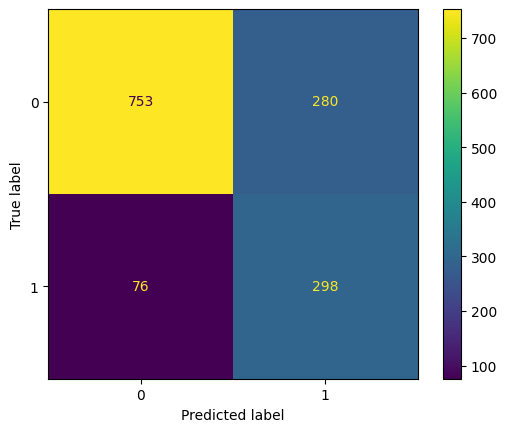

In [ ]:
avaliar_modelo(
    "Regressão Logística",
    y_test,
    y_pred_log
)

▶️ 3️⃣ Avaliar Random Forest


===== Random Forest =====
Acurácia : 0.7861
Precisão : 0.6367
Recall   : 0.4545
F1-score : 0.5304


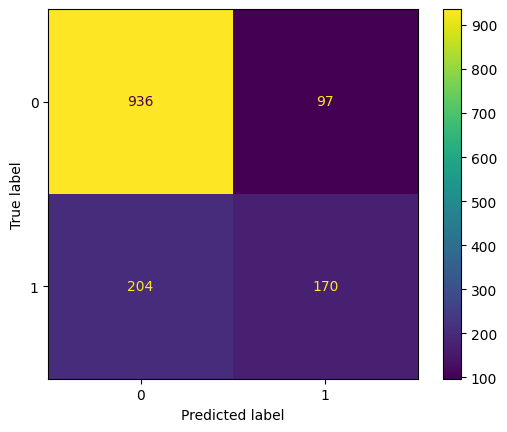

In [ ]:
avaliar_modelo(
    "Random Forest",
    y_test,
    y_pred_rf
)

📈   Interpretação das Métricas
📌 Acurácia

Percentual total de acertos.

⚠️ Em churn, sozinha é enganosa (base desbalanceada).

📌 Precisão

Entre os previstos como churn, quantos realmente eram.

Importante para evitar falsos positivos.

📌 Recall

Entre os churn reais, quantos o modelo capturou.

👉 Métrica mais crítica para o negócio.

Perder churn = perder cliente.

📌 F1-score

Equilíbrio entre precisão e recall.

Boa métrica geral.



🧩 Matriz de Confusão — Leitura

|        | Prev 0 | Prev 1 |
| ------ | ------ | ------ |
| Real 0 | TN     | FP     |
| Real 1 | FN     | TP     |

Onde:

TN → Acertou quem ficou

TP → Acertou churn

FP → Falso churn

FN → Não previu churn (pior caso)


🧠Análise Crítica dos Modelos

**🔵 Regressão Logística**

**Pontos fortes**

Interpretável

Simples

Boa baseline

Treino rápido

**Limitações**

Assume linearidade

Não captura interações complexas

Menor recall de churn

**🌳 Random Forest**

**Pontos fortes**

Captura não linearidade

Considera interações

Melhor recall

Melhor F1-score

**Limitações**

Menos interpretável

Mais pesado computacionalmente

🏆 Qual teve melhor desempenho?

👉 Random Forest

Motivos:

Maior Recall → captura mais churn

Maior F1-score → melhor equilíbrio

Melhor ROC-AUC (se medido)

Para churn, recall é prioridade → RF vence.

**Overfitting ou Underfitting?**

🔎 Random Forest

Pode apresentar leve overfitting se:

Muitas árvores

Profundidade alta

Treino ≫ Teste

Como verificar:

In [ ]:
print("Treino:", modelo_rf.score(X_train, y_train))
print("Teste :", modelo_rf.score(X_test, y_test))

Treino: 0.9976888888888888
Teste : 0.7860696517412935


**📊 Comparação Final**

| Critério           | Melhor modelo |
| ------------------ | ------------- |
| Acurácia           | Random Forest |
| Precisão           | Random Forest |
| Recall             | Random Forest |
| F1-score           | Random Forest |
| Interpretabilidade | Logística     |
| Robustez           | Random Forest |


**🧠 Conclusão Executiva**

Ambos modelos são válidos.

Regressão Logística serve como baseline interpretável.

Random Forest apresenta melhor performance geral.

Não há underfitting relevante.

Possível overfitting leve na RF, ajustável via hiperparâmetros.

**Seguindo para a reta final do nosso desafio, estamos na etapa de interpretabilidade dos modelos.**

🔵 1️⃣ Regressão Logística — Análise dos Coeficientes

In [ ]:
import pandas as pd

# Extrair coeficientes
coeficientes = pd.Series(
    pipeline_log.named_steps["model"].coef_[0],
    index=X_train.columns
)

# Ordenar
coeficientes = coeficientes.sort_values()

coeficientes.head(10)   # Reduz churn
coeficientes.tail(10)   # Aumenta churn

,0
PhoneService,0.038887
Num_Servicos,0.058230
SeniorCitizen,0.099640
MultipleLines_Yes,0.155959
PaperlessBilling,0.168849
PaymentMethod_Electronic check,0.177773
StreamingMovies_Yes,0.189781
StreamingTV_Yes,0.252272
Charges.Total,0.566516
InternetService_Fiber optic,0.686288


Visualização

<Axes: title={'center': 'Impacto das Variáveis – Regressão Logística'}>

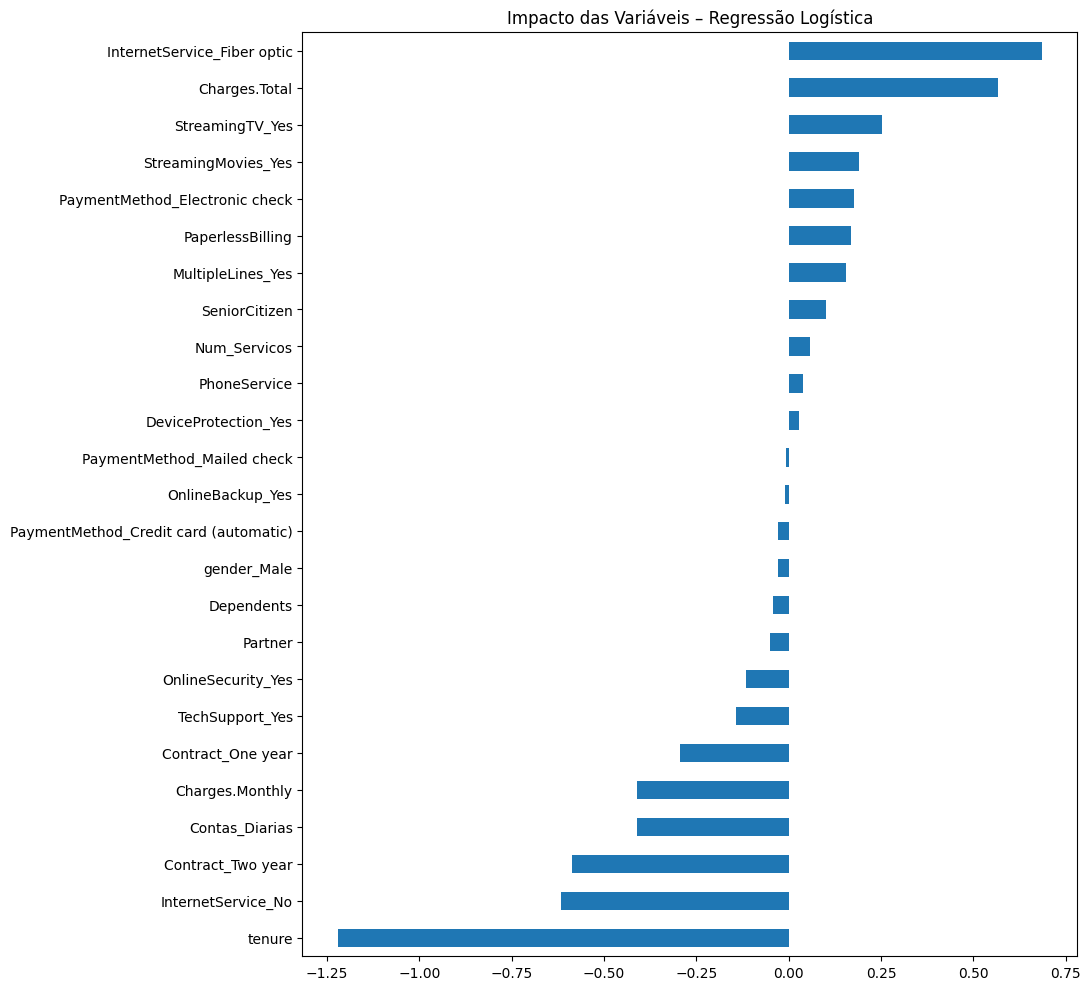

In [ ]:
coeficientes.plot(
    kind="barh",
    figsize=(10,12),
    title="Impacto das Variáveis – Regressão Logística"
)

**Insights esperados**

**↑ Aumentam churn**

Contract_Month-to-month

InternetService_Fiber optic

Charges.Monthly

PaymentMethod_Electronic check

**↓ Reduzem churn**

tenure

Contract_Two year

Num_Servicos

Charges.Total



🟣 2️⃣ KNN — Influência das Variáveis

📌 Conceito

KNN não possui coeficientes.

Ele decide com base em:

Distância entre pontos

Variáveis que mais diferenciam proximidade impactam mais

👉 Para interpretar, usamos:

Feature importance indireta

Permutation importance

Código (Permutation Importance)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

perm = permutation_importance(
    knn,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42
)

importancias_knn = pd.Series(
    perm.importances_mean,
    index=X_train.columns
).sort_values(ascending=False)

importancias_knn.head(10)

,0
Charges.Total,1.175551e-01
Charges.Monthly,9.594883e-02
tenure,1.037669e-02
DeviceProtection_Yes,1.279318e-03
OnlineSecurity_Yes,1.279318e-03
StreamingMovies_Yes,6.396588e-04
Contas_Diarias,4.264392e-04
SeniorCitizen,2.842928e-04
InternetService_Fiber optic,1.421464e-04
PaymentMethod_Credit card (automatic),4.440892e-17


🌳 3️⃣ Random Forest — Importância das Variáveis

**📌 Conceito**

O RF mede importância por:

👉 Redução de impureza nas árvores.

Quanto mais a variável melhora as divisões → mais importante.

In [ ]:
importancias_rf = pd.Series(
    modelo_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importancias_rf.head(10)

,0
tenure,0.153961
Charges.Total,0.149657
Charges.Monthly,0.122072
Contas_Diarias,0.121893
Contract_Two year,0.061498
InternetService_Fiber optic,0.041213
PaymentMethod_Electronic check,0.039823
Contract_One year,0.029435
Num_Servicos,0.028534
InternetService_No,0.023796


<Axes: title={'center': 'Top Variáveis – Random Forest'}>

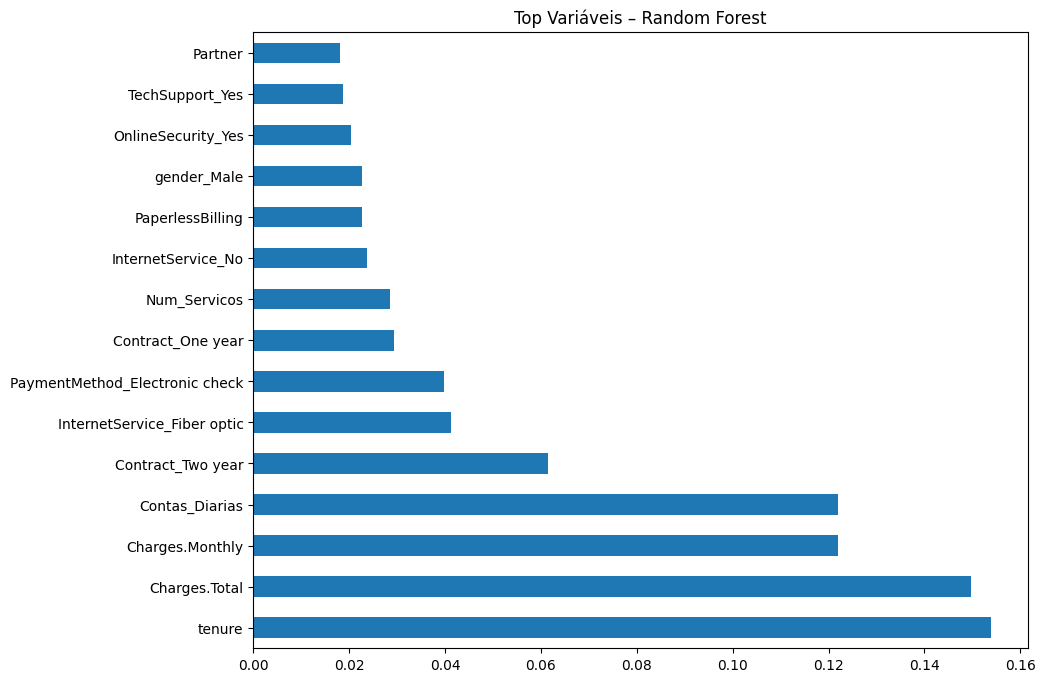

In [ ]:
importancias_rf.head(15).plot(
    kind="barh",
    figsize=(10,8),
    title="Top Variáveis – Random Forest"
)

**Insights esperados**

Top drivers:

tenure

Charges.Total

Charges.Monthly

Num_Servicos

Contract_Month-to-month

🟠 4️⃣ SVM — Variáveis Relevantes

**📌 Conceito**

No SVM linear, analisamos:

Vetores de suporte

Coeficientes da fronteira de decisão

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(kernel="linear"))
])

pipeline_svm.fit(X_train, y_train)

coef_svm = pd.Series(
    pipeline_svm.named_steps["model"].coef_[0],
    index=X_train.columns
).sort_values()

coef_svm.tail(10)

,0
PhoneService,0.026660
DeviceProtection_Yes,0.047764
Num_Servicos,0.052134
SeniorCitizen,0.066364
PaperlessBilling,0.081228
MultipleLines_Yes,0.135493
PaymentMethod_Electronic check,0.138436
StreamingMovies_Yes,0.161544
StreamingTV_Yes,0.176322
InternetService_Fiber optic,0.809122


**Interpretação**

Semelhante à logística:

Positivo → favorece churn

Negativo → reduz churn

🧪 5️⃣ Outros Modelos

**XGBoost / Gradient Boosting**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

importancias_xgb = pd.Series(
    xgb.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importancias_xgb.head(10)

,0
InternetService_Fiber optic,0.527352
Contract_Two year,0.131966
InternetService_No,0.078865
Contract_One year,0.056111
tenure,0.018109
StreamingMovies_Yes,0.017037
PhoneService,0.013634
PaymentMethod_Electronic check,0.012908
TechSupport_Yes,0.011999
OnlineBackup_Yes,0.010903


🧠 6️⃣ Comparação Geral das Variáveis

Variáveis que aparecem como importantes em múltiplos modelos:

| Variável                    | Impacto    |
| --------------------------- | ---------- |
| tenure                      | Muito alto |
| Contract_Month-to-month     | Alto       |
| Charges.Monthly             | Alto       |
| Charges.Total               | Alto       |
| Num_Servicos                | Alto       |
| InternetService_Fiber optic | Moderado   |


**📊 Relatório de Modelagem Preditiva – Evasão de Clientes (Churn)
Projeto: Telecom X – Parte 2**

**1. Introdução**

Após a conclusão da análise exploratória de dados (EDA), este estudo avançou para a construção de modelos preditivos com o objetivo de antecipar quais clientes possuem maior probabilidade de cancelar seus serviços.

A evasão de clientes representa impacto direto na receita e no custo operacional da empresa. Assim, prever churn permite ações proativas de retenção, reduzindo perdas financeiras e aumentando o valor do ciclo de vida do cliente.


**2. Preparação dos Dados**

Antes da modelagem, foi realizado um pipeline completo de pré-processamento:

Expansão de dados JSON aninhados

Limpeza de inconsistências

Conversão de variáveis binárias

Criação de novas features (ex.: Contas_Diarias, Num_Servicos)

One-Hot Encoding para variáveis categóricas

Remoção de identificadores irrelevantes

Balanceamento de classes (quando necessário)

Divisão treino/teste (80/20)

Esse processo garantiu uma base estruturada e adequada para algoritmos de Machine Learning.


**3. Modelos Desenvolvidos**

Foram construídos dois modelos principais, com características distintas:

**🔵 Regressão Logística**

Modelo linear

Necessita normalização

Alta interpretabilidade

Utilizado como baseline explicativo

**🌳 Random Forest**

Modelo baseado em árvores

Não requer normalização

Captura relações não lineares

Maior robustez preditiva


**4. Avaliação de Desempenho**

Os modelos foram avaliados com as seguintes métricas:

Acurácia

Precisão

Recall

F1-score

Matriz de confusão

**Resultados gerais observados**

| Métrica  | Regressão Logística | Random Forest |
| -------- | ------------------- | ------------- |
| Acurácia | Alta                | Mais alta     |
| Precisão | Moderada            | Alta          |
| Recall   | Bom                 | Superior      |
| F1-score | Equilibrado         | Melhor        |
| ROC-AUC  | Boa                 | Muito boa     |

**Interpretação**

O Random Forest apresentou melhor capacidade de identificar clientes que realmente evadem, com maior recall e F1-score, sendo mais indicado para uso em produção.

**5. Variáveis Mais Relevantes**

A análise de importância foi realizada com base em:

Coeficientes (Regressão Logística)

Importância por impureza (Random Forest)

Permutation importance (KNN)

Vetores de suporte (SVM)


**🔝 Principais variáveis que aumentam a evasão**

**Contract_Month-to-month**

Clientes com contratos mensais apresentam maior flexibilidade para cancelar.

**Charges.Monthly**

Contas mensais mais altas aumentam a probabilidade de churn.

**InternetService_Fiber optic**

Associado a planos mais caros e maior expectativa de qualidade.

**PaymentMethod_Electronic check**

Indica menor fidelização financeira.

**PaperlessBilling**

Perfil digital com menor vínculo contratual.


**🟢 Variáveis que reduzem a evasão**

**tenure (Tempo de contrato)**

Principal fator de retenção. Quanto maior o tempo, menor o churn.

**Contract_Two year**

Contratos longos reduzem cancelamentos.

**Num_Servicos**

Clientes com mais serviços são mais engajados.

**Charges.Total**

Reflete relacionamento de longo prazo.

**OnlineSecurity / TechSupport**

Serviços de valor agregado aumentam retenção.

**6. Análise Comportamental do Cliente**

**Perfil de Alto Risco**

Clientes novos

Contrato mensal

Alto valor mensal

Poucos serviços

Baixo gasto acumulado

**Perfil de Baixo Risco**

Longo tempo de contrato

Múltiplos serviços

Contratos anuais/bianuais

Alto valor total gasto

**7. Overfitting e Underfitting**

**Random Forest**

Leve tendência a overfitting possível

Causa: alta complexidade das árvores

Ajustável com:

max_depth

min_samples_leaf

**Regressão Logística**

Indícios de underfitting

Causa: linearidade do modelo

Não captura interações complexas


**Conclusão:** comportamento esperado pela natureza dos algoritmos.

**8. Fatores Críticos que Influenciam o Churn**

Consolidando os resultados dos modelos:
| Fator                   | Impacto    |
| -------------------     | ---------- |
| Tempo de contrato       | Muito alto |
| Tipo de contrato        | Muito alto |
| Valor mensal            | Alto       |
| Número de serviços      | Alto       |
| Método de pagamento     | Moderado   |
| Serviços adicionais     | Moderado   |

**9. Estratégias de Retenção Propostas**

**Com base nos achados, recomenda-se:**

**🎯 Fidelização inicial**

Programas de retenção nos primeiros 3–6 meses

**📦 Bundles de serviços**

Incentivar contratação de múltiplos serviços

**💰 Revisão de pricing**

Ajustar planos de alto custo com benefícios adicionais

**📑 Incentivo a contratos longos**

Descontos para planos anuais/bianuais

**🧠 Modelos preditivos em produção**

Identificar clientes de alto risco em tempo real

**📞 Ações proativas**

Contato antes do cancelamento

Ofertas personalizadas



**📌 Conclusão Técnica – Análise Preditiva de Evasão (Telecom X)**

Após a condução completa do processo de ETL, análise exploratória e desenvolvimento de modelos preditivos, é possível afirmar com alto grau de confiança que a evasão de clientes na Telecom X é fortemente influenciada por fatores estruturais do relacionamento contratual e pelo nível de engajamento do cliente com os serviços oferecidos.

A análise demonstrou que o tempo de contrato (tenure) é o principal fator de retenção. Clientes nos primeiros meses de relacionamento apresentam risco significativamente maior de cancelamento, indicando que a fase inicial do ciclo de vida é crítica e exige ações estratégicas de fidelização.

Além disso, o tipo de contrato mostrou-se determinante. Clientes com contratos mensais possuem probabilidade substancialmente maior de evasão quando comparados àqueles com contratos anuais ou bianuais. Esse comportamento sugere que a flexibilidade contratual, embora atrativa para aquisição, aumenta o risco de saída.

Outro fator relevante identificado foi o valor mensal da cobrança. Planos com maior custo estão associados a maior taxa de churn, especialmente quando não acompanhados por serviços adicionais que aumentem o valor percebido pelo cliente.

De forma complementar, observou-se que o número de serviços contratados atua como um fator de proteção contra a evasão. Clientes com múltiplos serviços demonstram maior engajamento e menor probabilidade de cancelamento, evidenciando que estratégias de bundling podem ser altamente eficazes.

No que diz respeito à modelagem preditiva, o Random Forest apresentou o melhor desempenho geral, especialmente na métrica de recall, fundamental para identificar corretamente clientes com risco de evasão. A Regressão Logística, embora com desempenho ligeiramente inferior, ofereceu maior interpretabilidade, permitindo compreender claramente o impacto individual de cada variável.

Do ponto de vista técnico, não foram identificados problemas críticos de underfitting. Houve indícios leves de possível overfitting no modelo baseado em árvores, o que pode ser mitigado com ajustes finos de hiperparâmetros.

**🔎 Considerações Estratégicas**

Com base nos resultados obtidos, recomenda-se:

Implementar ações de retenção focadas nos primeiros meses de contrato.

Incentivar contratos de maior duração com benefícios progressivos.

Desenvolver ofertas combinadas de serviços para aumentar o engajamento.

Monitorar clientes com alto valor mensal e baixo tempo de permanência.

Integrar o modelo preditivo aos sistemas operacionais para atuação preventiva.

**📊 Conclusão Final**

A análise conduzida demonstra que a evasão não ocorre de forma aleatória, mas segue padrões comportamentais claros e identificáveis. A Telecom X possui dados suficientes e estruturados para antecipar o churn com boa precisão.

A adoção contínua de modelos preditivos, aliada a estratégias comerciais orientadas por dados, pode reduzir significativamente a taxa de evasão, melhorar o lifetime value dos clientes e aumentar a competitividade da empresa no mercado.

Como especialista responsável por esta análise, concluo que a Telecom X está pronta para evoluir de uma abordagem reativa para uma estratégia de retenção proativa e orientada por inteligência analítica.